# Deep-fake Forensics Challenge 🌐
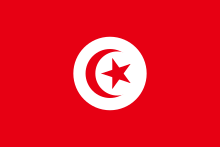



<span style="color:orange;font:bold">**IEEE COMPUTER SOCIETY ESPRIT SB**</span><br>

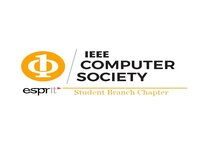

### **Team Members**

* Yasmine Mzoughi
* Adam Sfar
* Jihed Horchani
* Fares Frini
* Ons Kchaou
* Ahmed Hadded

### Introduction : 

In this lab, we will embark on a journey to explore the potential of image Visualization and Manipulation Techniques for detecting two forms of synthetic media : Shallowfakes and Deepfakes. 

We will delve into the following key areas for each form :

* **ShallowFakes** 

   * **Data Understanding and Exploring**
   * **Data Processing and Manipulation Techniques**
   #
   

* **DeepFakes**

   * **Data Understanding and Exploring**
   * **Data Processing and Manipulation Techniques**
   #
   


* **Alternative Techniques**




# <span style="color:#549D5F"> **ShallowFakes** </span>

<span style="color:#FFE047"> **STEP 1** :Data Understanding and Exploring 📊🗂️  </span><br>

* Import libraries

In [83]:
import warnings
import pandas as pd
import matplotlib as plt 
from glob import glob
import numpy as np
import cv2 
import os
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from PIL import Image
import torch.nn.functional as NF
import math
import torchvision.models as models
import torch.utils.model_zoo as model_zoo
import sys
import requests
from io import BytesIO
warnings.filterwarnings("ignore")

Initial Data Exploration for ShallowFakes
Here are the steps we've taken during the Data Understanding phase :

* Loading the Dataset: We loaded the dataset from the **"casia.csv"**
file to examine its contents.


In [84]:
Shallow_data = pd.read_csv('dataset/casia.csv', index_col=0)
Shallow_data.head(10)


image_path mask_path edge_path  Real/Fake
0  data/CASIA2.0_revised/Au/Au_pla_30544.jpg       NaN       NaN          0
1  data/CASIA2.0_revised/Au/Au_nat_30463.jpg       NaN       NaN          0
2  data/CASIA2.0_revised/Au/Au_pla_30162.jpg       NaN       NaN          0
3  data/CASIA2.0_revised/Au/Au_ind_20064.jpg       NaN       NaN          0
4  data/CASIA2.0_revised/Au/Au_ind_00028.jpg       NaN       NaN          0
5  data/CASIA2.0_revised/Au/Au_arc_20069.jpg       NaN       NaN          0
6  data/CASIA2.0_revised/Au/Au_art_10006.jpg       NaN       NaN          0
7  data/CASIA2.0_revised/Au/Au_ani_20039.jpg       NaN       NaN          0
8  data/CASIA2.0_revised/Au/Au_arc_30693.jpg       NaN       NaN          0
9  data/CASIA2.0_revised/Au/Au_pla_30215.jpg       NaN       NaN          0

* Data Structure: We determined the size of the dataset (number of rows and columns) to understand its overall dimensions.


In [85]:
Shallow_data.shape

(9949, 4)

=> **The dataset contains a total of 9949 records and 4 features.**

In [86]:
Shallow_data.info()
Shallow_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9949 entries, 0 to 9948
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  9949 non-null   object
 1   mask_path   3958 non-null   object
 2   edge_path   3958 non-null   object
 3   Real/Fake   9949 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 388.6+ KB


Real/Fake
count  9949.000000
mean      0.397829
std       0.489474
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

* **BARPLOT** 

Number of Real images : 5991
Number of Fake images :  3958


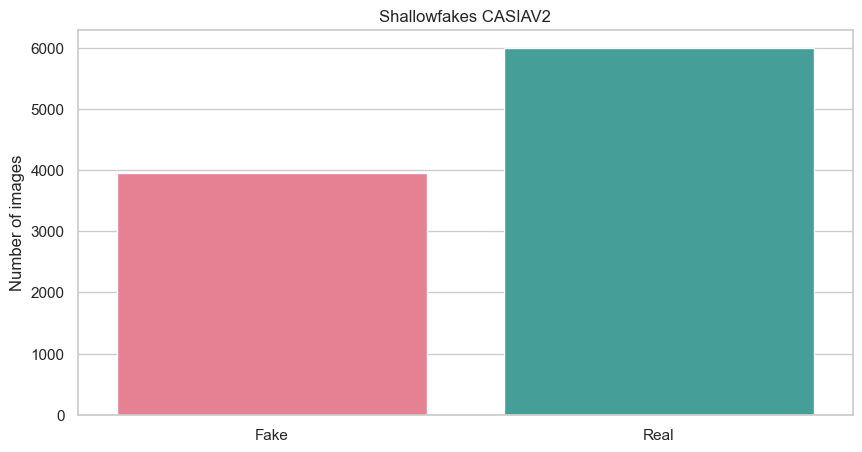

In [87]:
AU = Shallow_data.loc[Shallow_data['Real/Fake'] == 0]
TP = Shallow_data.loc[Shallow_data['Real/Fake'] == 1]

LR=AU["image_path"].tolist()
LF=TP["image_path"].tolist()


x1=len(LR)
x2=len(LF)

print('Number of Real images :',x1)
print('Number of Fake images : ',x2)   

# Assuming x1 and x2 are your data arrays
x1 = np.array([len(LR)])
x2 = np.array([len(LF)])

# Check if the lengths of x1 and x2 are the same
if len(x1) != len(x2):
    raise ValueError("Lengths of x1 and x2 must be the same")

# creating the dataset
data = {'Fake': x2, 'Real': x1}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=df, palette='husl')

plt.ylabel("Number of images")
plt.title("Shallowfakes CASIAV2")
plt.show()

=> We identified that our dataset contains more Real images than Fake ones 

* **P.I.E CHART**

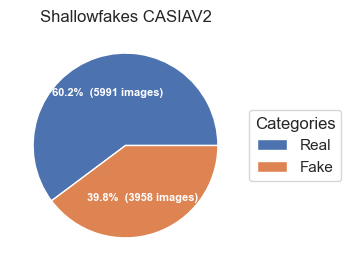

In [88]:
# Assuming x1 and x2 are your data arrays
x1 = np.array([len(LR)])
x2 = np.array([len(LF)])

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Combine Real and Fake into one list
data = [np.sum(x1), np.sum(x2)]
ingredients = ['Real', 'Fake']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%  ({absolute:d} images)"

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Shallowfakes CASIAV2")

plt.show()

=> This emphasizes the proportion of real images compared to fake ones

<span style="color:#FFE047"> **STEP 2** :Data Processing and Manipulation Techniques 📈📉 </span><br>

**Exploring MVSSNet: A Deep Dive into Functionalities and Image Applications**

<p>This document delves into the MVSSNet architecture, examining the functionality of each component and exploring its potential through image-based tests for SahllowFakes .<br> We'll be systematically testing all available functions of MVSSNet and observing their outputs on various images to gain a comprehensive understanding of its capabilities.</p>


In [89]:
class BayarConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=5, stride=1, padding=0):
        super(BayarConv2d, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.minus1 = (torch.ones(self.in_channels, self.out_channels, 1) * -1.000)

        # Declare the kernel as a trainable parameter
        self.kernel = nn.Parameter(torch.rand(out_channels, in_channels, kernel_size, kernel_size),
                                   requires_grad=True)

    def forward(self, x):
        # Perform convolution using the BayarConv2d kernel
        out = nn.functional.conv2d(x, self.kernel, stride=self.stride, padding=self.padding)
        return out

# Example usage
in_channels = 3
out_channels = 64
kernel_size = 5
stride = 1
padding = 2
bayar_conv = BayarConv2d(in_channels, out_channels, kernel_size, stride, padding)
print (bayar_conv.minus1)
print("BayarConv2d Parameters:")
for name, param in bayar_conv.named_parameters():
    print(f"{name}: {param.shape}")

batch_size = 1
height = 32
width = 32
input_tensor = torch.randn(batch_size, in_channels, height, width)
output = bayar_conv(input_tensor)
print("Output shape:", output.shape)

tensor([[[-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
         [-1.],
        

=> We define a custom convolution layer called BayarConv2d, which differs from standard PyTorch convolution by having a trainable kernel, offering more flexibility for neural network design and training. We demonstrates its instantiation, parameter access, data processing, and output shape. Further analysis is needed to understand the bias term and compare it to standard convolution

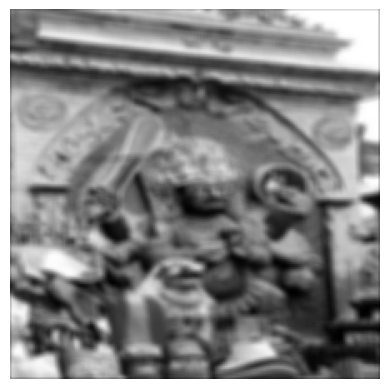

Output shape: torch.Size([1, 64, 222, 222])


In [90]:
# Load and preprocess the image
image_path = "image/hind.jpg"
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
input_tensor = transform(image).unsqueeze(0)

# Create an instance of BayarConv2d
in_channels = 3
out_channels = 64
kernel_size = 5
stride = 1
padding = 1
bayar_conv = BayarConv2d(in_channels, out_channels, kernel_size, stride, padding)

# Pass the input tensor through the BayarConv2d module
output = bayar_conv(input_tensor)

# Convert the output tensor to a numpy array
output_np = output.squeeze().detach().numpy()

# Visualize one channel of the output
channel_index = 0  # Choose the channel to visualize
output_channel = output_np[channel_index]

# Display the output channel
plt.imshow(output_channel, cmap='gray')
plt.axis('off')
plt.show()

# Print the output shape
print("Output shape:", output.shape)

=> We load and preprocesses an image, define a **BayarConv2d** object, passes the image through the layer, converts and visualizes a specific channel of the output, and prints the output shape




Input shape: torch.Size([1, 3, 597, 403])
Output shape: torch.Size([1, 64, 593, 399])


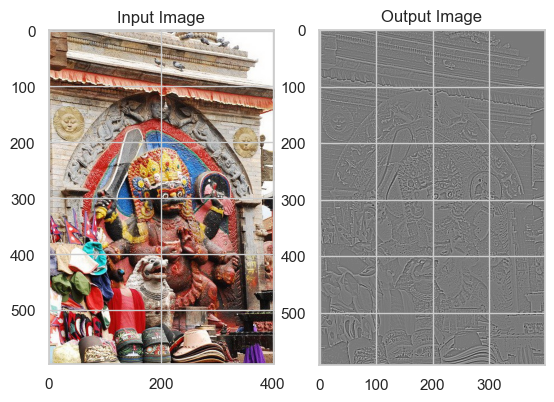

In [91]:
class BayarConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=5, stride=1, padding=0):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.minus1 = (torch.ones(self.in_channels, self.out_channels, 1) * -1.000)

        super(BayarConv2d, self).__init__()
        # only (kernel_size ** 2 - 1) trainable params as the center element is always -1
        self.kernel = nn.Parameter(torch.rand(self.in_channels, self.out_channels, kernel_size ** 2 - 1),
                                   requires_grad=True)


    def bayarConstraint(self):
        self.kernel.data = self.kernel.permute(2, 0, 1)
        self.kernel.data = torch.div(self.kernel.data, self.kernel.data.sum(0))
        self.kernel.data = self.kernel.permute(1, 2, 0)
        ctr = self.kernel_size ** 2 // 2
        real_kernel = torch.cat((self.kernel[:, :, :ctr], self.minus1.to(self.kernel.device), self.kernel[:, :, ctr:]), dim=2)
        real_kernel = real_kernel.reshape((self.out_channels, self.in_channels, self.kernel_size, self.kernel_size))
        return real_kernel

    def forward(self, x):
        x = NF.conv2d(x, self.bayarConstraint(), stride=self.stride, padding=self.padding)
        return x
    # Create an instance of the BayarConv2d module
in_channels = 3  # Assuming RGB image
out_channels = 64  # Number of output channels
kernel_size = 5
stride = 1
padding = 0
bayar_conv = BayarConv2d(in_channels, out_channels, kernel_size, stride, padding)

# Load the image
image_path = "image/hind.jpg"
image = Image.open(image_path)

# Convert the image to a numpy array
input_np = np.array(image, dtype=np.uint8)

# Convert the numpy array to a torch tensor
input_tensor = torch.from_numpy(input_np).permute(2, 0, 1).unsqueeze(0).float() / 255.0

# Pass the input tensor through the BayarConv2d module
output = bayar_conv(input_tensor)

# Convert the output tensor to a numpy array
output_np = output.detach().numpy()

# Print the shapes of the input and output tensors
print("Input shape:", input_tensor.shape)
print("Output shape:", output.shape)

# Select a single channel from the output tensor
output_channel = output_np[0, 0]  # Selecting the first channel

# Visualize the input and output images
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(input_np)
plt.subplot(1, 2, 2)
plt.title("Output Image")
plt.imshow(output_channel, cmap="gray")  # Displaying a single channel
plt.show()

=> We define a custom convolution layer called **BayarConv2d** with constrained filter weights. It includes a **BayarConstraint** method to enforce the constraint and applies it before each forward pass through the layer. We also demonstrates how to use the **BayarConv2d** layer with an image and visualize the output.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input shape: torch.Size([1, 3, 224, 224])
Output shape: torch.Size([1, 256, 224, 224])


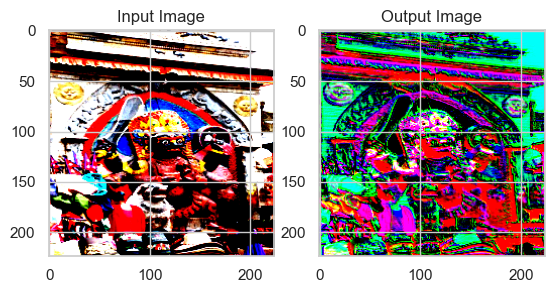

In [92]:
def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)
# Define the Bottleneck module
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, rate=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=rate, dilation=rate, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

# Load the image
image_path = "image/hind.jpg"
image = Image.open(image_path)

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to (224, 224)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

# Create an instance of the Bottleneck module
inplanes = 3  # Update this line to match the number of input channels
planes = 64
stride = 1
downsample = nn.Sequential(
    nn.Conv2d(inplanes, planes * Bottleneck.expansion, kernel_size=1, stride=stride, bias=False),
    nn.BatchNorm2d(planes * Bottleneck.expansion)
)
bottleneck = Bottleneck(inplanes, planes, stride=stride, downsample=downsample)

# Perform the forward pass
output = bottleneck(input_batch)

# Convert the output tensor to a numpy array
output_np = output.detach().numpy()

# Print the shapes of the input and output tensors
print("Input shape:", input_batch.shape)
print("Output shape:", output.shape)

# Visualize the input and output images
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(input_tensor.permute(1, 2, 0))
plt.subplot(1, 2, 2)
plt.title("Output Image")
plt.imshow(output_np[0].transpose(1, 2, 0)[..., :3])
plt.show()

=> We define and uses a custom module called **Bottleneck** for image processing. It details the module's structure and forward pass, then demonstrates how to use it with an image. We preprocesses the image, passes it through the Bottleneck, and visualizes the input and output side-by-side. 
* This showcases building and utilizing custom modules in PyTorch for image tasks.

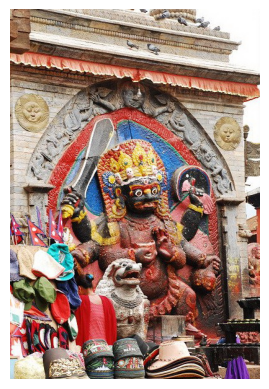

Predicted class index: 469


In [93]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000, n_input=3):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(n_input, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        rates = [1, 2, 4]
        self.layer4 = self._make_deeplabv3_layer(block, 512, layers[3], rates=rates, stride=1)  # stride 2 => stride 1
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def _make_deeplabv3_layer(self, block, planes, blocks, rates, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, rate=rates[i]))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x
    # Load the image
image_path = "image/hind.jpg"
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to (224, 224)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

# Number of classes in the model
num_classes = 1000

# Create an instance of the ResNet model with pre-trained weights
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512, num_classes)  # Adjust the last fully connected layer

# Set the model to evaluation mode
model.eval()

# Perform the forward pass
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class index
predicted_class_index = torch.argmax(output, dim=1).item()

# Print the predicted class index
print("Predicted class index:", predicted_class_index)


=> We define a **ResNet model** and uses it for image classification. It builds the model with various layers, define functions to create **ResNet** blocks, and implements the forward pass. Then, it loads and displays an image, preprocesses it, configures the pre-trained **ResNet model**, and performs a forward pass with the image. Finally, it extracts and prints the predicted class index.

In [94]:
def get_sobel(in_chan, out_chan):
    filter_x = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1],
    ]).astype(np.float32)
    filter_y = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1],
    ]).astype(np.float32)

    return apply_filters(in_chan, out_chan, filter_x, filter_y)

def apply_filters(in_chan, out_chan, filter_x, filter_y):
    filter_x = filter_x.reshape((1, 1, 3, 3))
    filter_x = np.repeat(filter_x, in_chan, axis=1)
    filter_x = np.repeat(filter_x, out_chan, axis=0)

    filter_y = filter_y.reshape((1, 1, 3, 3))
    filter_y = np.repeat(filter_y, in_chan, axis=1)
    filter_y = np.repeat(filter_y, out_chan, axis=0)

    filter_x = torch.from_numpy(filter_x)
    filter_y = torch.from_numpy(filter_y)
    filter_x = nn.Parameter(filter_x, requires_grad=False)
    filter_y = nn.Parameter(filter_y, requires_grad=False)
    conv_x = nn.Conv2d(in_chan, out_chan, kernel_size=3, stride=1, padding=1, bias=False)
    conv_x.weight = filter_x
    conv_y = nn.Conv2d(in_chan, out_chan, kernel_size=3, stride=1, padding=1, bias=False)
    conv_y.weight = filter_y
    edge_x = nn.Sequential(conv_x, nn.BatchNorm2d(out_chan))
    edge_y = nn.Sequential(conv_y, nn.BatchNorm2d(out_chan))
    return edge_x, edge_y

def run_sobel(conv_x, conv_y, input):
    g_x = conv_x(input)
    g_y = conv_y(input)
    g = torch.sqrt(torch.pow(g_x, 2) + torch.pow(g_y, 2))
    return torch.sigmoid(g) * input


def rgb2gray(rgb):
    # changed from bgr to rgb
    r, g, b = rgb[:, 0, :, :], rgb[:, 1, :, :], rgb[:, 2, :, :]
    gray = 0.2989*r + 0.5870*g + 0.1140*b
    gray = torch.unsqueeze(gray, 1)
    return gray


class BayarConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=5, stride=1, padding=0):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.minus1 = (torch.ones(self.in_channels, self.out_channels, 1) * -1.000)

        super(BayarConv2d, self).__init__()
        # only (kernel_size ** 2 - 1) trainable params as the center element is always -1
        self.kernel = nn.Parameter(torch.rand(self.in_channels, self.out_channels, kernel_size ** 2 - 1),
                                   requires_grad=True)


    def bayarConstraint(self):
        self.kernel.data = self.kernel.permute(2, 0, 1)
        self.kernel.data = torch.div(self.kernel.data, self.kernel.data.sum(0))
        self.kernel.data = self.kernel.permute(1, 2, 0)
        ctr = self.kernel_size ** 2 // 2
        real_kernel = torch.cat((self.kernel[:, :, :ctr], self.minus1.to(self.kernel.device), self.kernel[:, :, ctr:]), dim=2)
        real_kernel = real_kernel.reshape((self.out_channels, self.in_channels, self.kernel_size, self.kernel_size))
        return real_kernel

    def forward(self, x):
        x = NF.conv2d(x, self.bayarConstraint(), stride=self.stride, padding=self.padding)
        return x

model_urls = {
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
}


def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, rate=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=rate, dilation=rate, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000, n_input=3):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(n_input, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        rates = [1, 2, 4]
        self.layer4 = self._make_deeplabv3_layer(block, 512, layers[3], rates=rates, stride=1)  # stride 2 => stride 1
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def _make_deeplabv3_layer(self, block, planes, blocks, rates, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, rate=rates[i]))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


def resnet(pretrained=False, layers=[3,4,6,3], backbone='resnet50', n_input=3, **kwargs):
    """Constructs a ResNet-50 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, layers, n_input=n_input, **kwargs)

    pretrain_dict = model_zoo.load_url(model_urls[backbone])
    try:
        model.load_state_dict(pretrain_dict,strict=False)
    except:
        print("loss conv1")
        model_dict = {}
        for k, v in pretrain_dict.items():
            if k in pretrain_dict and 'conv1' not in k:
                model_dict[k] = v
        model.load_state_dict(model_dict, strict=False)
    print("load pretrain success")
    return model


class ResNet50(nn.Module):
    def __init__(self, pretrained=True,n_input=3):
        """Declare all needed layers."""
        super(ResNet50, self).__init__()
        self.model = resnet(n_input=n_input, pretrained=pretrained, layers=[3, 4, 6, 3], backbone='resnet50')
        self.relu = self.model.relu  # Place a hook

        layers_cfg = [4, 5, 6, 7]
        self.blocks = []
        for i, num_this_layer in enumerate(layers_cfg):
            self.blocks.append(list(self.model.children())[num_this_layer])

    def base_forward(self, x):
        feature_map = []
        x = self.model.conv1(x)
        x = self.model.bn1(x)
        x = self.model.relu(x)
        x = self.model.maxpool(x)

        for i, block in enumerate(self.blocks):
            x = block(x)
            feature_map.append(x)

        out = nn.AvgPool2d(x.shape[2:])(x).view(x.shape[0], -1)

        return feature_map, out


class ERB(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ERB, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.bn = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)

    def forward(self, x, relu=True):
        x = self.conv1(x)
        res = self.conv2(x)
        res = self.bn(res)
        res = self.relu(res)
        res = self.conv3(res)
        if relu:
            return self.relu(x + res)
        else:
            return x+res


class MVSSNet(ResNet50):
    def __init__(self, nclass, aux=False, constrain=False, n_input=3, **kwargs):
        super(MVSSNet, self).__init__(pretrained=True, n_input=n_input)
        self.num_class = nclass
        self.aux = aux

        self.__setattr__('exclusive', ['head'])

        self.upsample = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.upsample_4 = nn.Upsample(scale_factor=4, mode="bilinear", align_corners=True)
        self.constrain = constrain

        self.erb_db_1 = ERB(256, self.num_class)
        self.erb_db_2 = ERB(512, self.num_class)
        self.erb_db_3 = ERB(1024, self.num_class)
        self.erb_db_4 = ERB(2048, self.num_class)

        self.erb_trans_1 = ERB(self.num_class, self.num_class)
        self.erb_trans_2 = ERB(self.num_class, self.num_class)
        self.erb_trans_3 = ERB(self.num_class, self.num_class)

        # to use the pretrained model, edge_x and edge_y should be named sobel_x and sobel_y
        print("----------use sobel-------------")
        self.sobel_x1, self.sobel_y1 = get_sobel(256, 1)
        self.sobel_x2, self.sobel_y2 = get_sobel(512, 1)
        self.sobel_x3, self.sobel_y3 = get_sobel(1024, 1)
        self.sobel_x4, self.sobel_y4 = get_sobel(2048, 1)

        if self.constrain:
            print("----------use constrain-------------")
            self.noise_extractor = ResNet50(n_input=3, pretrained=True)
            self.constrain_conv = BayarConv2d(in_channels=1, out_channels=3, padding=2)
            self.head = _DAHead(2048+2048, self.num_class, aux, **kwargs)
        else:
            self.head = _DAHead(2048, self.num_class, aux, **kwargs)

    def forward(self, x):
        size = x.size()[2:]
        input_ = x.clone()
        feature_map, _ = self.base_forward(input_)
        c1, c2, c3, c4 = feature_map

        res1 = self.erb_db_1(run_sobel(self.sobel_x1, self.sobel_y1, c1))
        res1 = self.erb_trans_1(res1 + self.upsample(self.erb_db_2(run_sobel(self.sobel_x2, self.sobel_y2, c2))))
        res1 = self.erb_trans_2(res1 + self.upsample_4(self.erb_db_3(run_sobel(self.sobel_x3, self.sobel_y3, c3))))
        res1 = self.erb_trans_3(res1 + self.upsample_4(self.erb_db_4(run_sobel(self.sobel_x4, self.sobel_y4, c4))), relu=False)

        if self.constrain:
            x = rgb2gray(x)
            x = self.constrain_conv(x)
            constrain_features, _ = self.noise_extractor.base_forward(x)
            constrain_feature = constrain_features[-1]
            c4 = torch.cat([c4, constrain_feature], dim=1)

        outputs = []

        x = self.head(c4)
        x0 = NF.interpolate(x[0], size, mode='bilinear', align_corners=True)
        outputs.append(x0)

        if self.aux:
            x1 = NF.interpolate(x[1], size, mode='bilinear', align_corners=True)
            x2 = NF.interpolate(x[2], size, mode='bilinear', align_corners=True)
            outputs.append(x1)
            outputs.append(x2)

        return res1, x0

class _PositionAttentionModule(nn.Module):
    """ Position attention module"""

    def __init__(self, in_channels, **kwargs):
        super(_PositionAttentionModule, self).__init__()
        self.conv_b = nn.Conv2d(in_channels, in_channels // 8, 1)
        self.conv_c = nn.Conv2d(in_channels, in_channels // 8, 1)
        self.conv_d = nn.Conv2d(in_channels, in_channels, 1)
        self.alpha = nn.Parameter(torch.zeros(1))
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        batch_size, _, height, width = x.size()
        feat_b = self.conv_b(x).view(batch_size, -1, height * width).permute(0, 2, 1)
        feat_c = self.conv_c(x).view(batch_size, -1, height * width)
        attention_s = self.softmax(torch.bmm(feat_b, feat_c))
        feat_d = self.conv_d(x).view(batch_size, -1, height * width)
        feat_e = torch.bmm(feat_d, attention_s.permute(0, 2, 1)).view(batch_size, -1, height, width)
        out = self.alpha * feat_e + x

        return out


class _ChannelAttentionModule(nn.Module):
    """Channel attention module"""

    def __init__(self, **kwargs):
        super(_ChannelAttentionModule, self).__init__()
        self.beta = nn.Parameter(torch.zeros(1))
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        batch_size, _, height, width = x.size()
        feat_a = x.view(batch_size, -1, height * width)
        feat_a_transpose = x.view(batch_size, -1, height * width).permute(0, 2, 1)
        attention = torch.bmm(feat_a, feat_a_transpose)
        attention_new = torch.max(attention, dim=-1, keepdim=True)[0].expand_as(attention) - attention
        attention = self.softmax(attention_new)

        feat_e = torch.bmm(attention, feat_a).view(batch_size, -1, height, width)
        out = self.beta * feat_e + x

        return out


class _DAHead(nn.Module):
    def __init__(self, in_channels, nclass, aux=True, norm_layer=nn.BatchNorm2d, norm_kwargs=None, **kwargs):
        super(_DAHead, self).__init__()
        self.aux = aux
        inter_channels = in_channels // 4
        self.conv_p1 = nn.Sequential(
            nn.Conv2d(in_channels, inter_channels, 3, padding=1, bias=False),
            norm_layer(inter_channels, **({} if norm_kwargs is None else norm_kwargs)),
            nn.ReLU(True)
        )
        self.conv_c1 = nn.Sequential(
            nn.Conv2d(in_channels, inter_channels, 3, padding=1, bias=False),
            norm_layer(inter_channels, **({} if norm_kwargs is None else norm_kwargs)),
            nn.ReLU(True)
        )
        self.pam = _PositionAttentionModule(inter_channels, **kwargs)
        self.cam = _ChannelAttentionModule(**kwargs)
        self.conv_p2 = nn.Sequential(
            nn.Conv2d(inter_channels, inter_channels, 3, padding=1, bias=False),
            norm_layer(inter_channels, **({} if norm_kwargs is None else norm_kwargs)),
            nn.ReLU(True)
        )
        self.conv_c2 = nn.Sequential(
            nn.Conv2d(inter_channels, inter_channels, 3, padding=1, bias=False),
            norm_layer(inter_channels, **({} if norm_kwargs is None else norm_kwargs)),
            nn.ReLU(True)
        )
        self.out = nn.Sequential(
            nn.Dropout(0.1),
            nn.Conv2d(inter_channels, nclass, 1)
        )
        if aux:
            self.conv_p3 = nn.Sequential(
                nn.Dropout(0.1),
                nn.Conv2d(inter_channels, nclass, 1)
            )
            self.conv_c3 = nn.Sequential(
                nn.Dropout(0.1),
                nn.Conv2d(inter_channels, nclass, 1)
            )

    def forward(self, x):
        feat_p = self.conv_p1(x)
        feat_p = self.pam(feat_p)
        feat_p = self.conv_p2(feat_p)

        feat_c = self.conv_c1(x)
        feat_c = self.cam(feat_c)
        feat_c = self.conv_c2(feat_c)

        feat_fusion = feat_p + feat_c

        outputs = []
        fusion_out = self.out(feat_fusion)
        outputs.append(fusion_out)
        if self.aux:
            p_out = self.conv_p3(feat_p)
            c_out = self.conv_c3(feat_c)
            outputs.append(p_out)
            outputs.append(c_out)

        return tuple(outputs)


def get_mvss(backbone='resnet50', pretrained_base=True, nclass=1, n_input=3, constrain=True, **kwargs):
    model = MVSSNet(nclass,
                    backbone=backbone,
                    pretrained_base=pretrained_base,
                    n_input=n_input,
                    constrain=constrain,
                    **kwargs)
    return model

=> We implement the **MVSSNet model** for semantic segmentation, based on **ResNet50**. It combines Sobel filters and residual blocks for feature extraction, utilizes attention modules for refinement, and outputs a segmentation map with class predictions for each pixel. It offers options to incorporate noise prediction for improved accuracy and generate auxiliary segmentation maps at different scales.

load pretrain success
----------use sobel-------------
Output from layer 1:
torch.Size([1, 30, 56, 56])


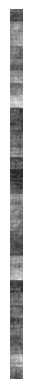

In [95]:
# Define the missing modules and functions

# Define the _DAHead class

# Define the MVSSNet class

# Load and preprocess the image
image_path = "image/hind.jpg"
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)

# Create an instance of MVSSNet
model = MVSSNet(nclass=30, aux=False, constrain=False)

# Load pre-trained weights if available
# model.load_state_dict(torch.load('path/to/pretrained/weights.pth'))

# Set the model to evaluation mode
model.eval()

# Forward pass through the model and store intermediate outputs
outputs = []
def hook(module, input, output):
    outputs.append(output[0])  # Access the tensor within the tuple

model.register_forward_hook(hook)
with torch.no_grad():
    model(input_tensor)

# Visualize the intermediate outputs
for i, output in enumerate(outputs):
    print(f"Output from layer {i+1}:")
    print(output.shape)

    # Concatenate all channels
    channels = output.squeeze().cpu().numpy()
    combined_image = np.concatenate(channels, axis=0)

    # Display the combined image
    plt.imshow(combined_image, cmap='gray')
    plt.axis('off')
    plt.show()

=> We define missing components of the **MVSSNet model** for semantic segmentation, load and preprocesse an image, creates an instance of the model, performs a forward pass, and hooks intermediate outputs. Finally, we visualizes these outputs to understand the feature maps learned at different network levels

load pretrain success
----------use sobel-------------
Output from layer 1:
torch.Size([1, 10, 56, 56])


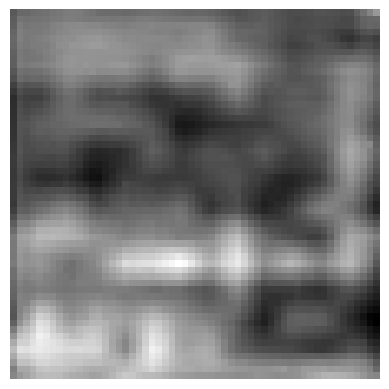

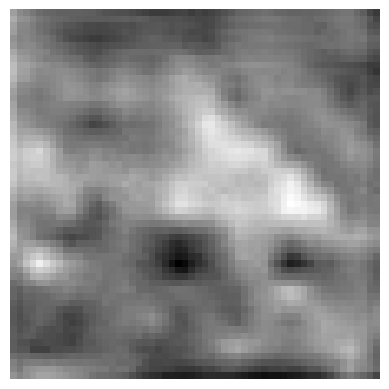

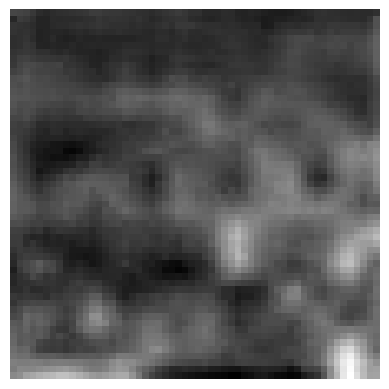

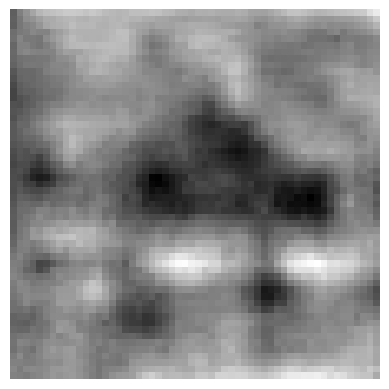

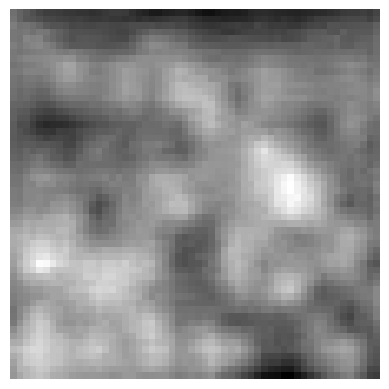

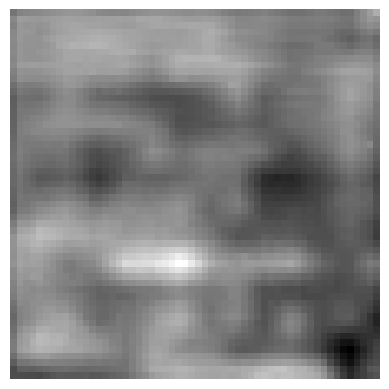

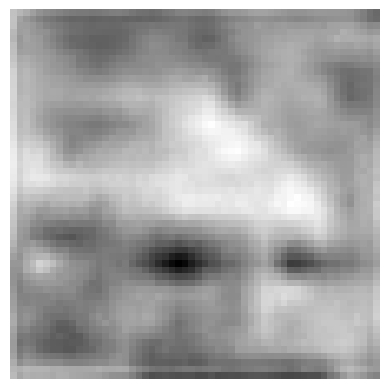

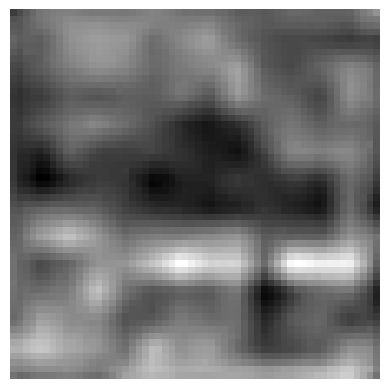

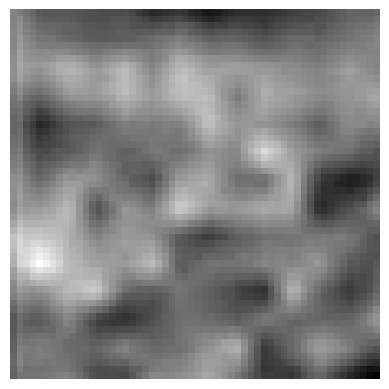

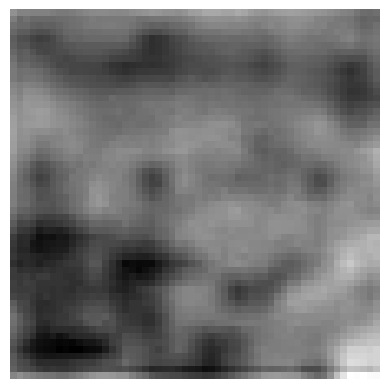

In [96]:
# Define the missing modules and functions

# Define the _DAHead class

# Define the MVSSNet class

# Load and preprocess the image
image_path = "image/hind.jpg"
image = Image.open(image_path).convert('RGB')

# Define the image transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformation to the image
input_tensor = transform(image).unsqueeze(0)

# Create an instance of MVSSNet
model = MVSSNet(nclass=10, aux=False, constrain=False)

# Load pre-trained weights if available
# model.load_state_dict(torch.load('path/to/pretrained/weights.pth'))

# Set the model to evaluation mode
model.eval()

# Forward pass through the model and store intermediate outputs
outputs = []

# Define a hook function to capture the intermediate outputs
def hook(module, input, output):
    outputs.append(output[0])  # Access the tensor within the tuple

# Register the hook function to the desired layer
model.register_forward_hook(hook)

# Perform a forward pass through the model
with torch.no_grad():
    model(input_tensor)

# Visualize the intermediate outputs
for i, output in enumerate(outputs):
    print(f"Output from layer {i+1}:")
    print(output.shape)

    # Iterate over channels
    for channel_idx in range(output.shape[1]):
        channel = output[:, channel_idx, :, :]
        channel_image = channel.squeeze().cpu().numpy()

        # Display the channel
        plt.imshow(channel_image, cmap='gray')
        plt.axis('off')
        plt.show()

=> We complete the missing parts of **the MVSSNet architecture** and analyze an image with it. we preprocesse the image, creates **the MVSSNet model**, captures intermediate outputs during a forward pass, and then visualizes each output channel as a grayscale image. This allows for understanding the feature maps learned by the model at different stages and how it processes the image for semantic segmentation

# <span style="color:#549D5F"> **DeepFakes** </span>

<span style="color:#FFE047"> **STEP 1** :Data Understanding and Exploring 📊🗂️  </span><br>

* Import libraries

In [97]:
import requests
from io import BytesIO
from torchvision.transforms import ToTensor

from torchvision.models import resnet50

import torchvision.models.resnet as resnet
from torchvision.models.resnet import Bottleneck



Initial Data Exploration for DeepFakes
Here are the steps we've taken during the Data Understanding phase :

* Loading the Dataset: We loaded the dataset from the **"deep.csv"**
file to examine its contents.


In [98]:
deepf = pd.read_csv('dataset/deep.csv' , index_col=0)
deepf.head()

image_path  Real/Fake
11287   dataimageyoutubeyoutube_066_8.png          0
11288  dataimageyoutubeyoutube_943_23.png          0
11289  dataimageyoutubeyoutube_602_61.png          0
11290  dataimageyoutubeyoutube_344_47.png          0
11291  dataimageyoutubeyoutube_948_51.png          0


* Data Structure: We determined the size of the dataset (number of rows and columns) to understand its overall dimensions.


In [99]:
deepf.shape

(7430, 2)

=> **The dataset contains a total of 7430 records and 2 features.**

In [100]:
deepf.info()
deepf.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7430 entries, 11287 to 18677
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7430 non-null   object
 1   Real/Fake   7430 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 174.1+ KB


Real/Fake
count  7430.000000
mean      0.498520
std       0.500031
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

* **BARPLOT** 

Number of Real images : 3726
Number of Fake images :  3704


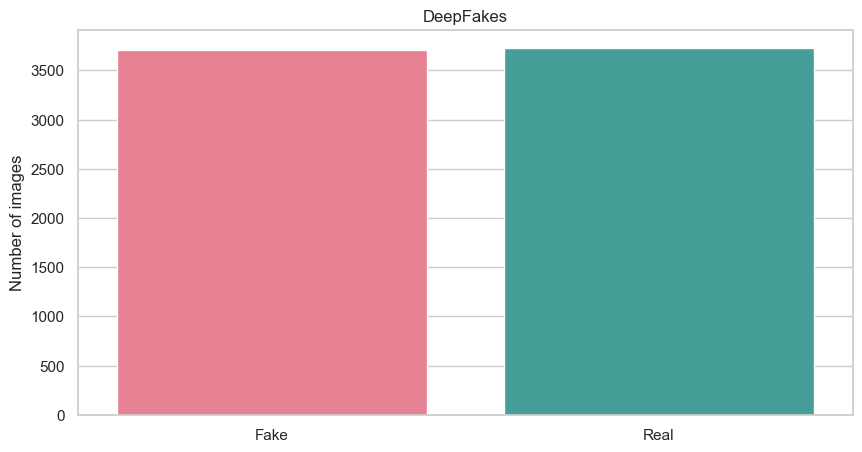

In [101]:
Real = deepf.loc[deepf['Real/Fake'] == 0]
Fake = deepf.loc[deepf['Real/Fake'] == 1]

LR=Real["image_path"].tolist()
LF=Fake["image_path"].tolist()


x1=len(LR)
x2=len(LF)

print('Number of Real images :',x1)
print('Number of Fake images : ',x2)   

# Assuming x1 and x2 are your data arrays
x1 = np.array([len(LR)])
x2 = np.array([len(LF)])

# Check if the lengths of x1 and x2 are the same
if len(x1) != len(x2):
    raise ValueError("Lengths of x1 and x2 must be the same")

# creating the dataset
data = {'Fake': x2, 'Real': x1}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=df, palette='husl')

plt.ylabel("Number of images")
plt.title("DeepFakes")
plt.show()

=> We identified that our dataset contains more Real images than Fake ones 

* **P.I.E CHART**

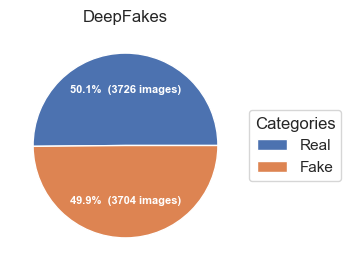

In [102]:
# Assuming x1 and x2 are your data arrays
x1 = np.array([len(LR)])
x2 = np.array([len(LF)])

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Combine Real and Fake into one list
data = [np.sum(x1), np.sum(x2)]
ingredients = ['Real', 'Fake']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%  ({absolute:d} images)"

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("DeepFakes")

plt.show()


=> We visualize the proportions of real and fake images using a **PIE Chart**. It combines the number of real and fake images into a single list, creates pie chart slices with percentages and absolute values displayed, adds a legend for the categories, and sets the title to **"DeepFakes"**. This provides a clear and informative way to understand the distribution of the data.

<span style="color:#FFE047"> **STEP 2** :Data Processing and Manipulation Techniques 📈📉 </span><br>

**Exploring ResNet50: A Deep Dive into Functionalities and Image Applications**



<p>ResNet50 is a 50-layer deep learning architecture designed for image recognition. It achieves remarkable accuracy and efficiency through residual connections, bypassing layers and directly learning from earlier activations.<br>This avoids the vanishing gradient problem and enables effective training. ResNet50 excels in image classification, detection, and its pre-trained models are readily available.</p>

In [103]:



__all__ = ['ResNet', 'resnet50', 'resnet101'] # resnet101 is coming soon!


model_urls = {
    'resnet50': 'http://sceneparsing.csail.mit.edu/model/pretrained_resnet/resnet50-imagenet.pth',
    'resnet101': 'http://sceneparsing.csail.mit.edu/model/pretrained_resnet/resnet101-imagenet.pth'
}


def conv3x3(in_planes, out_planes, stride=1):
    "3x3 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = SynchronizedBatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = SynchronizedBatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = SynchronizedBatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = SynchronizedBatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = SynchronizedBatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000):
        self.inplanes = 128
        super(ResNet, self).__init__()
        self.conv1 = conv3x3(3, 64, stride=2)
        self.bn1 = SynchronizedBatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(64, 64)
        self.bn2 = SynchronizedBatchNorm2d(64)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv3 = conv3x3(64, 128)
        self.bn3 = SynchronizedBatchNorm2d(128)
        self.relu3 = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, SynchronizedBatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                SynchronizedBatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu1(self.bn1(self.conv1(x)))
        x = self.relu2(self.bn2(self.conv2(x)))
        x = self.relu3(self.bn3(self.conv3(x)))
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x



def resnet50(pretrained=False, **kwargs):
    """Constructs a ResNet-50 model.

    Args:
        pretrained (bool): If True, returns a model pre-trained on Places
    """
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
    if pretrained:
        model.load_state_dict(load_url(model_urls['resnet50']), strict=False)
    return model


def resnet101(pretrained=False, **kwargs):
    """Constructs a ResNet-101 model.

    Args:
        pretrained (bool): If True, returns a model pre-trained on Places
    """
    model = ResNet(Bottleneck, [3, 4, 23, 3], **kwargs)
    if pretrained:
        model.load_state_dict(load_url(model_urls['resnet101']), strict=False)
    return model



def load_url(url, model_dir='./pretrained', map_location=None):
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    filename = url.split('/')[-1]
    cached_file = os.path.join(model_dir, filename)
    if not os.path.exists(cached_file):
        sys.stderr.write('Downloading: "{}" to {}\n'.format(url, cached_file))
        urlretrieve(url, cached_file)
    return torch.load(cached_file, map_location=map_location)


=>We define the ResNet architecture for image recognition. It specifies layers and connections within the network, including basic building blocks, layers with downsampling, and access to pre-trained models. We also define the forward pass, which details the computation flow through the network.

In [104]:


from torchvision.transforms import ToTensor

from torchvision.models import resnet50
import torchvision.models as models
import torchvision.models.resnet as resnet
from torchvision.models.resnet import Bottleneck
import torchvision.transforms as transforms
# Load the image
image_path = r"image/putin.png"
image = Image.open(image_path)

# Preprocess the image
transform = ToTensor()
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0)

# Check if a GPU is available and move the input batch to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_batch = input_batch.to(device)

# Create a ResNet-50 model and load pre-trained weights
model = resnet50(pretrained=True)
model = model.to(device)
model.eval()

# Perform forward pass
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class index
_, predicted_index = torch.max(output, 1)
predicted_class = predicted_index.item()

print("Predicted class:", predicted_class)

Predicted class: 906


=>We classifie an image using a pre-trained ResNet-50 model. It loads the image, preprocesses it, checks for a GPU and moves data if available, loads the model and sets it to evaluation mode, performs a forward pass, and prints the predicted class.

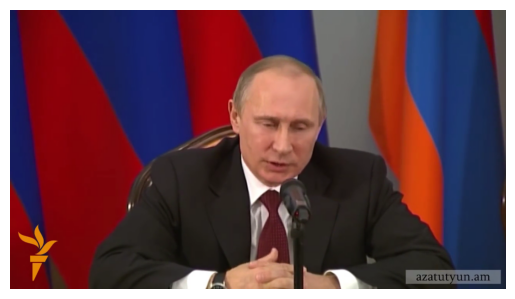

Predicted label: 906: 'Windsor tie',
Probability: 0.41610586643218994


In [105]:



model_urls = {
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
}


def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, rate=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=rate, dilation=rate, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


# Load the pre-trained ResNet model
model = models.resnet50(pretrained=True)
model.eval()

# Load and preprocess the image
image_path = "image/putin.png"
image = Image.open(image_path)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0)

# Run the image through the ResNet model
with torch.no_grad():
    output = model(input_batch)

# Load the class labels (e.g., for ImageNet dataset)
labels_path = "dataset/test.txt"
with open(labels_path) as f:
    labels = f.readlines()
labels = [label.strip() for label in labels]

# Get the predicted class label and probability
_, predicted_idx = torch.max(output, 1)
predicted_label = labels[predicted_idx.item()]
probability = torch.softmax(output, dim=1)[0][predicted_idx].item()

# Print the predicted class label and probability
plt.imshow(image)
plt.axis('off')
plt.show()
print("Predicted label:", predicted_label)
print("Probability:", probability)

=>We snippet demonstrates a practical example of using a pre-trained ResNet-50 model for image classification. We provides a clear understanding of the workflow, from model loading and image preparation to inference and results interpretation.

In [106]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000, n_input=3):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(n_input, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        rates = [1, 2, 4]
        self.layer4 = self._make_deeplabv3_layer(block, 512, layers[3], rates=rates, stride=1)  # stride 2 => stride 1
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def _make_deeplabv3_layer(self, block, planes, blocks, rates, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, rate=rates[i]))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


=>We define a ResNet architecture for image classification, specifically for semantic segmentation. It builds layers with modifications like atrous convolutions, and define the forward pass to process the input image through the network and output the prediction.

In [107]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
import torchvision.models as models
import matplotlib.pyplot as plt
import torch
from torchvision.models import resnet50
from torchvision import transforms
from PIL import Image


weights_path = r"model/resnet50-0676ba61.pth"
image_path = r"image/putin.png"
labels_path = r"dataset/test.txt"

# Load the pre-trained ResNet model and assign the weights
model = resnet50(pretrained=False)
model.load_state_dict(torch.load(weights_path))

# Load and preprocess the image
image = Image.open(image_path)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = transform(image)
image = image.unsqueeze(0)  # Add batch dimension

# Perform inference
output = model(image)

# Load the labels and get the predicted class
with open(labels_path) as f:
    labels = f.readlines()
labels = [label.strip() for label in labels]

_, predicted_idx = torch.max(output, 1)
predicted_label = labels[predicted_idx.item()]
print("Predicted label:", predicted_label)

Predicted label: 463: 'bucket, pail',



 =>We use a custom-weighted ResNet-50 model to analyze an image, preprocesse it, performs prediction, and identifies the most likely class based on the model's output.

**Exploring RFC-Net (Recurrent Fully Convolutional Network):**

=>RFC-Net combines recurrent and convolutional layers to achieve superior performance in image segmentation tasks. It excels at capturing temporal dependencies, handles images of any size, and generates accurate pixel-level predictions

In [108]:


def resnet(pretrained=False, layers=[3,4,6,3], backbone='resnet50', n_input=3, **kwargs):
    """Constructs a ResNet-50 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, layers, n_input=n_input, **kwargs)

    pretrain_dict = model_zoo.load_url(model_urls[backbone])
    try:
        model.load_state_dict(pretrain_dict,strict=False)
    except:
        print("loss conv1")
        model_dict = {}
        for k, v in pretrain_dict.items():
            if k in pretrain_dict and 'conv1' not in k:
                model_dict[k] = v
        model.load_state_dict(model_dict, strict=False)
    print("load pretrain success")
    return model


class ResNet50(nn.Module):
    def __init__(self, pretrained=True,n_input=3):
        """Declare all needed layers."""
        super(ResNet50, self).__init__()
        self.model = resnet(n_input=n_input, pretrained=pretrained, layers=[3, 4, 6, 3], backbone='resnet50')
        self.relu = self.model.relu  # Place a hook

        layers_cfg = [4, 5, 6, 7]
        self.blocks = []
        for i, num_this_layer in enumerate(layers_cfg):
            self.blocks.append(list(self.model.children())[num_this_layer])

    def base_forward(self, x):
        feature_map = []
        x = self.model.conv1(x)
        x = self.model.bn1(x)
        x = self.model.relu(x)
        x = self.model.maxpool(x)

        for i, block in enumerate(self.blocks):
            x = block(x)
            feature_map.append(x)

        out = nn.AvgPool2d(x.shape[2:])(x).view(x.shape[0], -1)

        return feature_map, out



class ResFCN(ResNet50):
    def __init__(self, nclass=1, aux=False, n_input=3, **kwargs):
        super(ResFCN, self).__init__(pretrained=True, n_input=n_input)
        self.num_class = nclass
        self.aux = aux

        self.__setattr__('exclusive', ['head'])

        self.upsample = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.upsample_4 = nn.Upsample(scale_factor=4, mode="bilinear", align_corners=True)


        self.head = _DAHead(2048, self.num_class, aux, **kwargs)

    def forward(self, x):
        size = x.size()[2:]
        input_ = x.clone()
        feature_map, _ = self.base_forward(input_)
        c1, c2, c3, c4 = feature_map

        outputs = []

        x = self.head(c4)
        x0 = F.interpolate(x[0], size, mode='bilinear', align_corners=True)
        outputs.append(x0)

        if self.aux:
            x1 = F.interpolate(x[1], size, mode='bilinear', align_corners=True)
            x2 = F.interpolate(x[2], size, mode='bilinear', align_corners=True)
            outputs.append(x1)
            outputs.append(x2)

        return 0, x0


class _PositionAttentionModule(nn.Module):
    """ Position attention module"""

    def __init__(self, in_channels, **kwargs):
        super(_PositionAttentionModule, self).__init__()
        self.conv_b = nn.Conv2d(in_channels, in_channels // 8, 1)
        self.conv_c = nn.Conv2d(in_channels, in_channels // 8, 1)
        self.conv_d = nn.Conv2d(in_channels, in_channels, 1)
        self.alpha = nn.Parameter(torch.zeros(1))
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        batch_size, _, height, width = x.size()
        feat_b = self.conv_b(x).view(batch_size, -1, height * width).permute(0, 2, 1)
        feat_c = self.conv_c(x).view(batch_size, -1, height * width)
        attention_s = self.softmax(torch.bmm(feat_b, feat_c))
        feat_d = self.conv_d(x).view(batch_size, -1, height * width)
        feat_e = torch.bmm(feat_d, attention_s.permute(0, 2, 1)).view(batch_size, -1, height, width)
        out = self.alpha * feat_e + x

        return out


class _ChannelAttentionModule(nn.Module):
    """Channel attention module"""

    def __init__(self, **kwargs):
        super(_ChannelAttentionModule, self).__init__()
        self.beta = nn.Parameter(torch.zeros(1))
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        batch_size, _, height, width = x.size()
        feat_a = x.view(batch_size, -1, height * width)
        feat_a_transpose = x.view(batch_size, -1, height * width).permute(0, 2, 1)
        attention = torch.bmm(feat_a, feat_a_transpose)
        attention_new = torch.max(attention, dim=-1, keepdim=True)[0].expand_as(attention) - attention
        attention = self.softmax(attention_new)

        feat_e = torch.bmm(attention, feat_a).view(batch_size, -1, height, width)
        out = self.beta * feat_e + x

        return out


class _DAHead(nn.Module):
    def __init__(self, in_channels, nclass, aux=True, norm_layer=nn.BatchNorm2d, norm_kwargs=None, **kwargs):
        super(_DAHead, self).__init__()
        self.aux = aux
        inter_channels = in_channels // 4
        self.conv_p1 = nn.Sequential(
            nn.Conv2d(in_channels, inter_channels, 3, padding=1, bias=False),
            norm_layer(inter_channels, **({} if norm_kwargs is None else norm_kwargs)),
            nn.ReLU(True)
        )
        self.conv_c1 = nn.Sequential(
            nn.Conv2d(in_channels, inter_channels, 3, padding=1, bias=False),
            norm_layer(inter_channels, **({} if norm_kwargs is None else norm_kwargs)),
            nn.ReLU(True)
        )
        self.pam = _PositionAttentionModule(inter_channels, **kwargs)
        self.cam = _ChannelAttentionModule(**kwargs)
        self.conv_p2 = nn.Sequential(
            nn.Conv2d(inter_channels, inter_channels, 3, padding=1, bias=False),
            norm_layer(inter_channels, **({} if norm_kwargs is None else norm_kwargs)),
            nn.ReLU(True)
        )
        self.conv_c2 = nn.Sequential(
            nn.Conv2d(inter_channels, inter_channels, 3, padding=1, bias=False),
            norm_layer(inter_channels, **({} if norm_kwargs is None else norm_kwargs)),
            nn.ReLU(True)
        )
        self.out = nn.Sequential(
            nn.Dropout(0.1),
            nn.Conv2d(inter_channels, nclass, 1)
        )
        if aux:
            self.conv_p3 = nn.Sequential(
                nn.Dropout(0.1),
                nn.Conv2d(inter_channels, nclass, 1)
            )
            self.conv_c3 = nn.Sequential(
                nn.Dropout(0.1),
                nn.Conv2d(inter_channels, nclass, 1)
            )

    def forward(self, x):
        feat_p = self.conv_p1(x)
        feat_p = self.pam(feat_p)
        feat_p = self.conv_p2(feat_p)

        feat_c = self.conv_c1(x)
        feat_c = self.cam(feat_c)
        feat_c = self.conv_c2(feat_c)

        feat_fusion = feat_p + feat_c

        outputs = []
        fusion_out = self.out(feat_fusion)
        outputs.append(fusion_out)
        if self.aux:
            p_out = self.conv_p3(feat_p)
            c_out = self.conv_c3(feat_c)
            outputs.append(p_out)
            outputs.append(c_out)

        return tuple(outputs)


=>This ResFCN code for semantic segmentation builds on pre-trained ResNet-50. It extracts feature maps, upsamples them for finer resolution, and fuses them. It incorporates attention modules: PAM for spatial relationships and CAM for channel importance. These modules enhance feature maps and lead to a more accurate segmentation head with optional auxiliary outputs.

In [109]:
import torch
import torchvision.models as models
import torchvision.models.resnet as resnet
from torchvision.models.resnet import Bottleneck
from PIL import Image
import torchvision.transforms as transforms
# Define the paths

weights_path = r"model/resnet50-0676ba61.pth"
image_path = r"image/putin.png"
labels_path = r"dataset/test.txt"

class ResFCN(resnet.ResNet):
    def __init__(self, nclass=1, aux=False, **kwargs):
        super(ResFCN, self).__init__(Bottleneck, [3, 4, 6, 3], **kwargs)
        self.num_class = nclass
        self.aux = aux

# Load the model
model = ResFCN()
model.load_state_dict(torch.load(weights_path))
model.eval()

# Load and preprocess the image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

# Run the model
with torch.no_grad():
    output = model(input_batch)

# Process the output
predicted_class = torch.argmax(output, dim=1).item()

# Load the class labels
with open(labels_path, "r") as file:
    class_labels = file.read().splitlines()

# Get the predicted class label
predicted_label = class_labels[predicted_class]

print("Predicted class label:", predicted_label)

Predicted class label:  400: "academic gown, academic robe, judge's robe",



=> we build a ResFCN model for image classification, loading pre-trained weights and setting up for semantic segmentation. He preprocesses an image, runs it through the model, retrieves the predicted class index, and uses class labels to print the predicted class.

# <span style="color:#549D5F"> **Alternative techniques** </span>

* Import libraries

In [110]:
#demonstration de plusieurs methodes de segmentation d'images
from glob import glob


plt.style.use('ggplot')

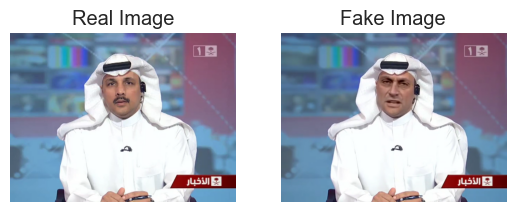

In [111]:
# File paths
real_img_paths = glob(r'image/real.png')
fake_img_paths = glob(r'image/fake.png')

# Load images
real_img = cv2.imread(real_img_paths[0])
fake_img = cv2.imread(fake_img_paths[0])

# Convert BGR to RGB
real_img_rgb = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
fake_img_rgb = cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB)

# Display real image
plt.subplot(1, 2, 1)
plt.imshow(real_img_rgb)
plt.title('Real Image')
plt.axis('off')

# Display fake image
plt.subplot(1, 2, 2)
plt.imshow(fake_img_rgb)
plt.title('Fake Image')
plt.axis('off')

# Show the plot
plt.show()


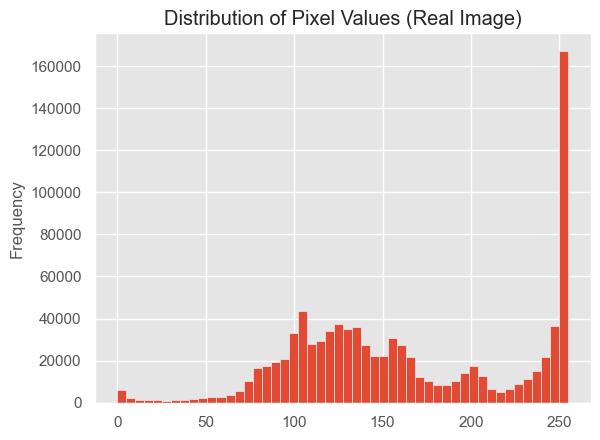

In [112]:
pd.Series(real_img_rgb.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values (Real Image)')
plt.show()


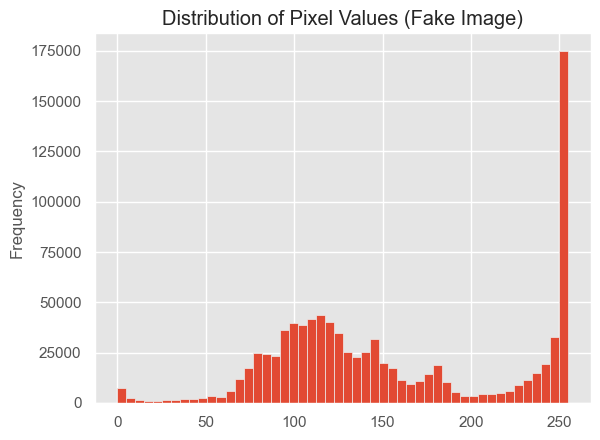

In [113]:
pd.Series(fake_img_rgb.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values (Fake Image)')
plt.show()

=> We can analyse from those two histograms that the real image has a broader range of colors (more evenly spread pixel values) compared to the fake image whose colors are concentrated towards the lower end of the spectrum. This suggests the fake image was likely created by a Generative Adversarial Network (GAN) or a simple thresholding technique. Analyzing such pixel value distributions can help distinguish real images from manipulated ones.

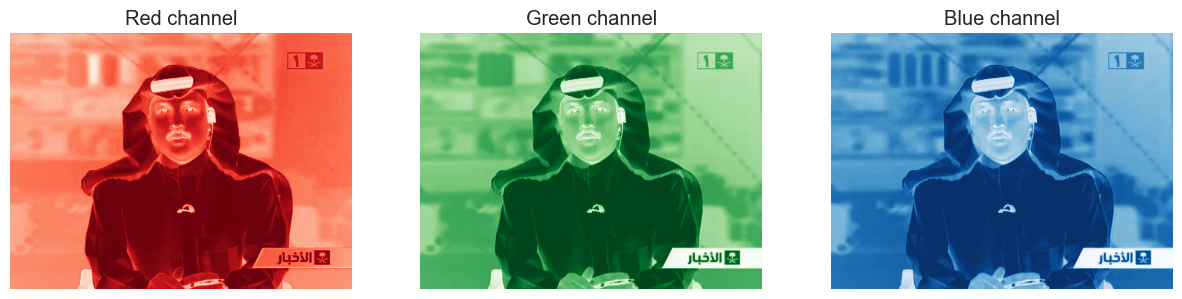

In [114]:
# Display RGB Channels of our real_image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(real_img_rgb[:,:,0], cmap='Reds')
axs[1].imshow(real_img_rgb[:,:,1], cmap='Greens')
axs[2].imshow(real_img_rgb[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

=> Analyzing an image's individual red, green, and blue channels (RGB) is like examining a painting under different colored lights. Each channel reveals hidden details and patterns that might be missed when viewing the whole picture. This allows us to identify color inconsistencies, detect manipulated images, extract specific features, and even enhance certain aspects of the image.

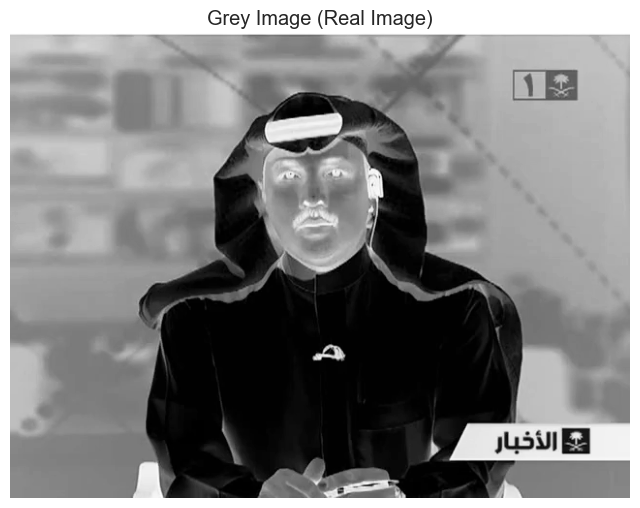

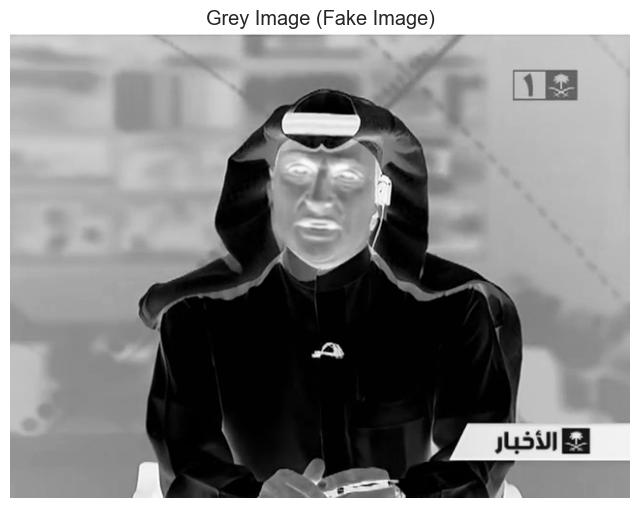

In [115]:
img_gray = cv2.cvtColor(real_img_rgb, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image (Real Image)')
plt.show()
img_gray = cv2.cvtColor(fake_img_rgb, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image (Fake Image)')
plt.show()

=> Analyzing these grayscale images can help identify patterns and anomalies that might be masked in the original color images, ultimately aiding in image analysis and manipulation tasks.

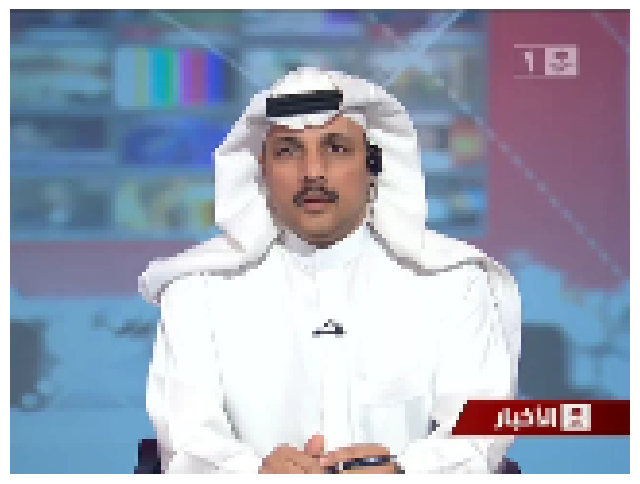

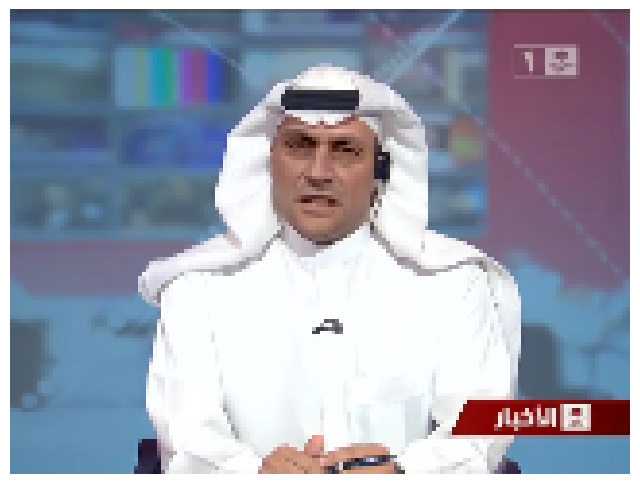

In [116]:
img_resized = cv2.resize(real_img_rgb, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()
img_resized = cv2.resize(fake_img_rgb, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

=> The code resizes both images to reduce complexity, decrease processing time, and improve visualization of specific features. This allows for a more efficient and effective analysis of image patterns, textures, and overall composition.

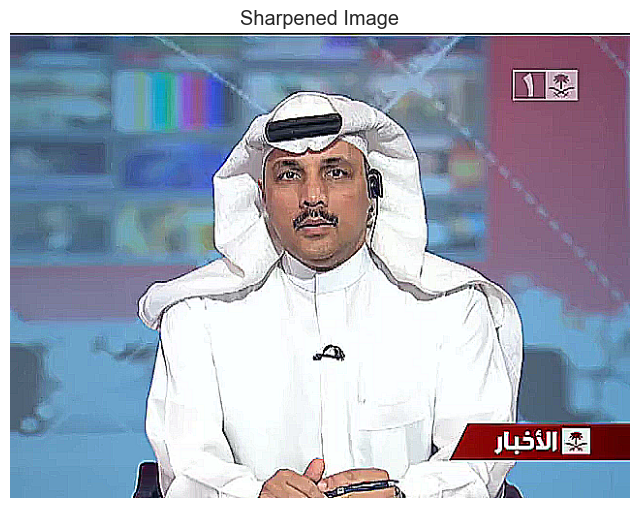

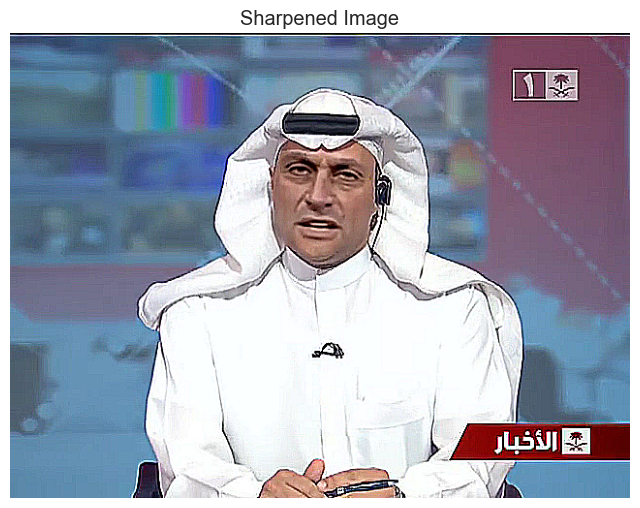

In [117]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(real_img_rgb, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened = cv2.filter2D(fake_img_rgb, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

=> Here the sharpened images reveal more details and edges compared to the original images. This can be beneficial for further analysis and identifying potential discrepancies.

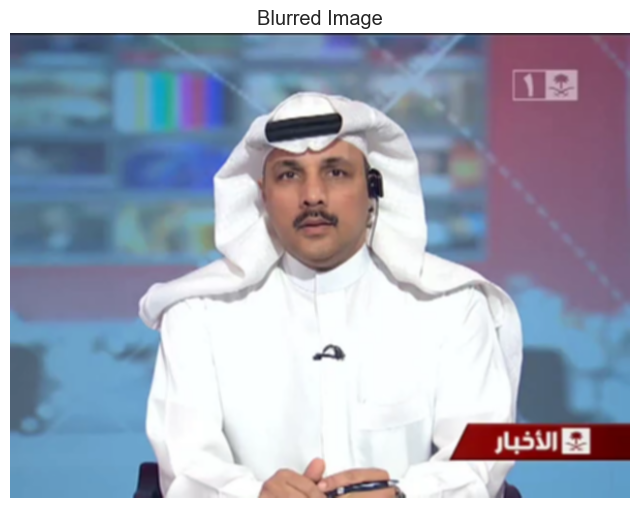

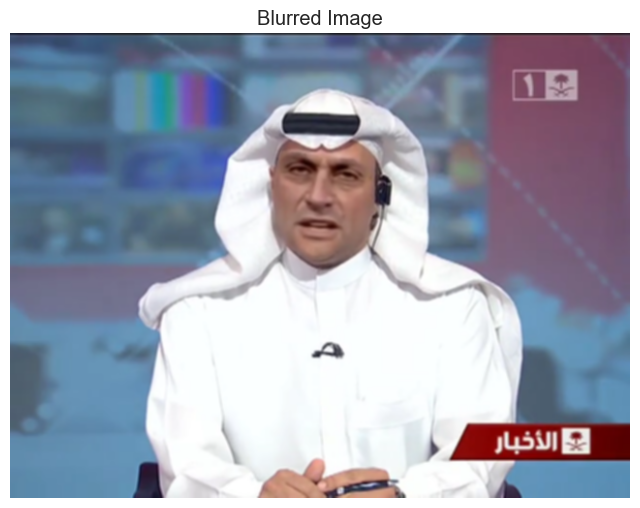

In [118]:
# Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(real_img_rgb, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(fake_img_rgb, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

=>The code blurs both images to reduce noise and high-frequency details, making it easier to analyze larger patterns and structures. This simplifies the image representation and can enhance the visualization of specific features like color balance, lighting, and overall composition. Blurring can also be beneficial as a pre-processing step for certain algorithms and can help identify manipulation techniques that affect global features.

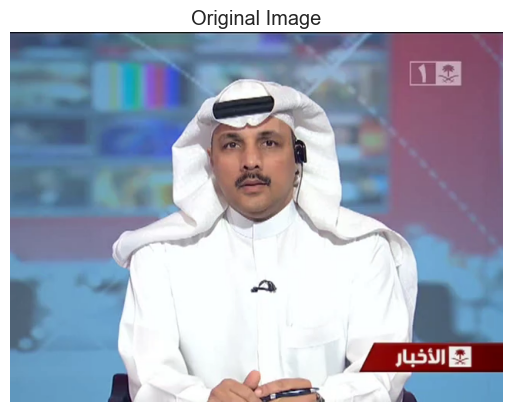

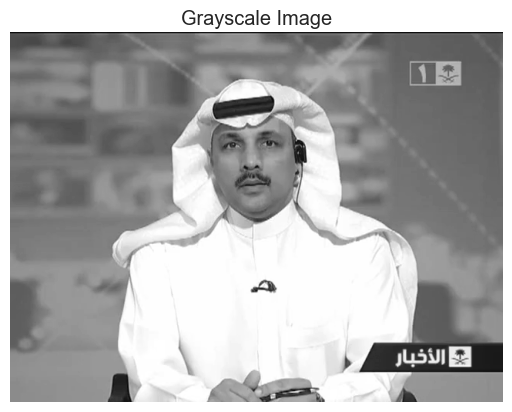

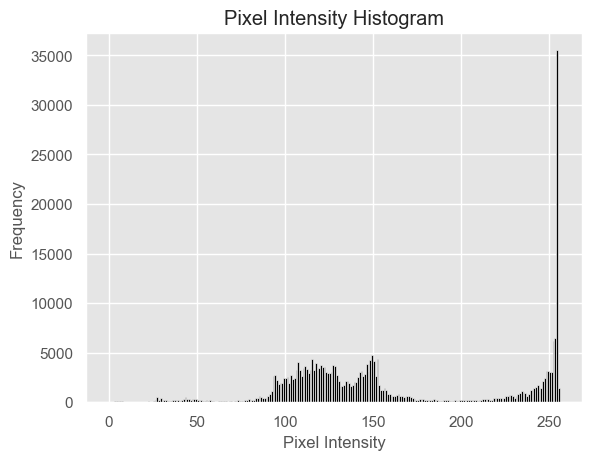

In [119]:
# Load the first image
image_path = 'image/real.png'
img = cv2.imread(image_path)

# Display the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert to grayscale and display
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Plot a histogram of pixel intensities
plt.hist(gray_img.flatten(), bins=256, range=[0, 256], color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Histogram')
plt.show()

=> Analyzing pixel intensity simplifies analysis by focusing on grayscale values, reveals color balance and potential anomalies through histograms, facilitates feature analysis by relating them to intensity variations, detects manipulation through unnatural intensity patterns, and offers quantitative representation for comparisons and statistical analysis.

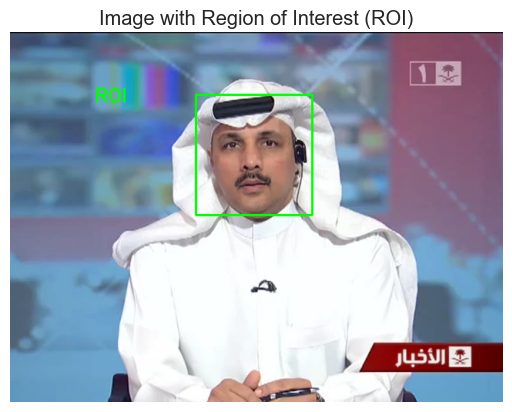

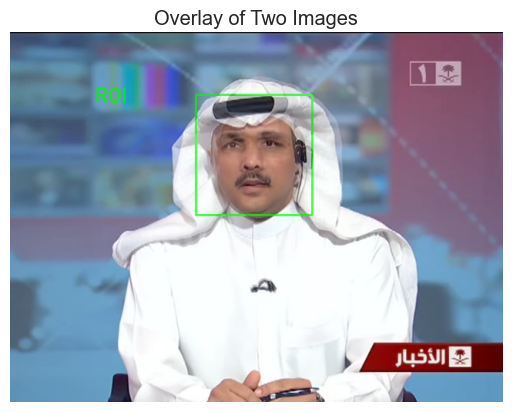

In [120]:
# Draw rectangles or shapes on the image
cv2.rectangle(img, (241, 237), (392,81 ), (0, 255, 0), 2)  # Draw a green rectangle
cv2.putText(img, 'ROI', (110, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with Region of Interest (ROI)')
plt.axis('off')
plt.show()

# Load the second image for overlay
img2 = cv2.imread('image/fake.png')

# Overlay the two images for /
overlay = cv2.addWeighted(img, 0.7, img2, 0.3, 0)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title('Overlay of Two Images')
plt.axis('off')
plt.show()

=> This code highlights a region of interest (ROI) on an image using a green rectangle and text. It then overlays this image with another image, creating a blended image for comparison.<br> This allows for focused analysis, visual comparison, and potential detection of differences between the images, aiding in image manipulation detection or other image processing tasks.

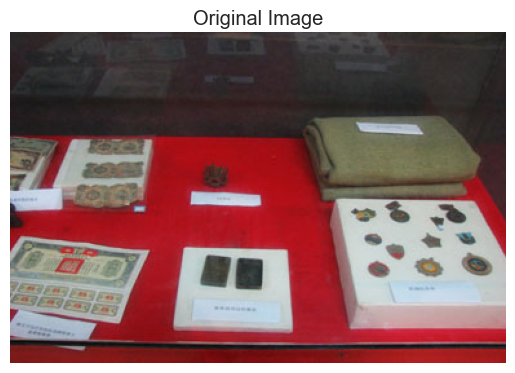

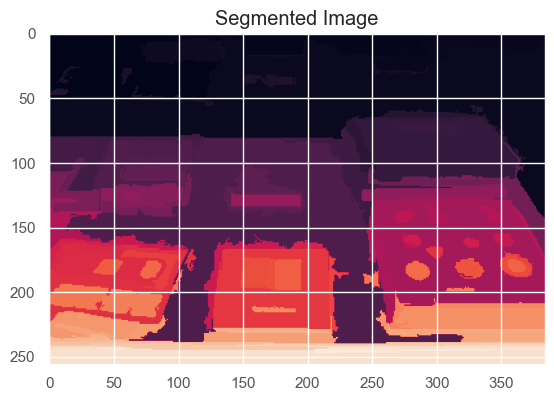

In [121]:

from skimage import segmentation

# Load the image
img = cv2.imread('image/shallow.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply image segmentation (e.g., using Felzenszwalb's algorithm)
segments = segmentation.felzenszwalb(gray_img, scale=100, sigma=0.5, min_size=50)

# Visualize the segmented image
plt.imshow(segments)
plt.title('Segmented Image')
plt.show()


=> This code performs image segmentation using the Felzenszwalb algorithm. It first converts the image to grayscale and then segments it based on similar intensity values. Finally, it visualizes the segmented image, highlighting different regions with unique colors. This helps analyze different parts of the image, detect objects, and perform various image processing tasks.

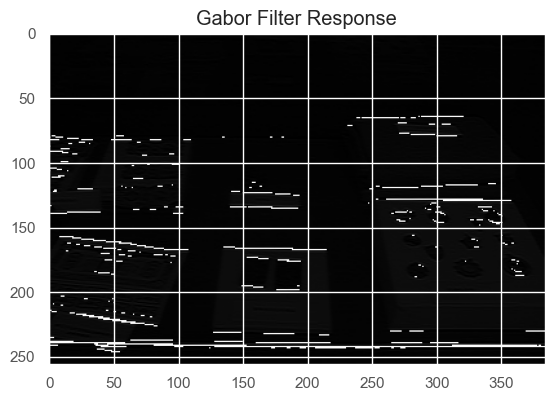

In [122]:
from skimage.filters import gabor

# Calculate Gabor features
img = cv2.imread('image/shallow.jpg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
frequency = 0.6
theta = 1.5
gabor_response, _ = gabor(gray_image, frequency=frequency, theta=theta)

# Display the Gabor response
plt.imshow(gabor_response, cmap='gray')
plt.title('Gabor Filter Response')
plt.show()

=> This code snippet utilizes a Gabor filter to extract features from an image. It first reads and converts the image to grayscale. Then, it calculates the Gabor response using specific frequency and theta parameters, highlighting areas with similar textures and edges. Finally, the code visualizes the filtered image and revealing extracted features.


<span style="color:#549D5F"> **Conclusion** <br></span>
After applying various functions to analyze the shallowfake and deepfake images, it becomes clear that we need to develop a model capable of differentiating between these two forms of image manipulation. This model will play a crucial role in combating the spread of misinformation and protecting individuals from potential harm.